In [1]:
#importing Libraries
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

C:\Users\Akkju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Akkju\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Sat Jun 14 07:58:30 2025).


In [2]:
#Data Cleaning - Datetime format (job posted date) & string to list(job skills)

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x)else x)

In [3]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [4]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [5]:
df_DA_exploded = df_DA_US.explode('job_skills')
df_DA_exploded[['job_title_short','job_skills']].head()

,job_title_short,job_skills
109,Data Analyst,python
109,Data Analyst,r
109,Data Analyst,alteryx
109,Data Analyst,tableau
180,Data Analyst,excel


In [6]:
df_DA_skills = df_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

In [7]:
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})

In [8]:
df_total_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / df_total_job_count * 100 #percentage

In [9]:
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [10]:
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent']> skill_percent]

In [11]:
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


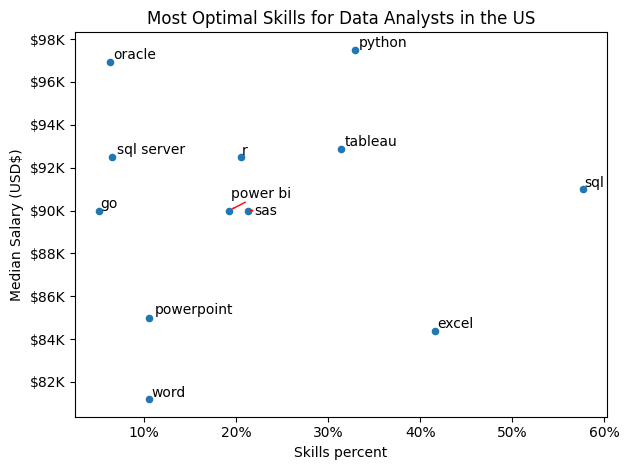

In [12]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind='scatter', y='median_salary', x='skill_percent')

texts = [] #Created a list and appending as below to use adjust_text

for i, txt in enumerate(df_DA_skills_high_demand.index): 
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops = dict(arrowstyle="->", color ='r'))

ax = plt.gca() #access to the current axis gca = get current axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 
ax.xaxis.set_major_formatter(PercentFormatter())

plt.title('Most Optimal Skills for Data Analysts in the US')
plt.ylabel("Median Salary (USD$)")
plt.xlabel('Skills percent')

plt.tight_layout()
plt.show()

In [13]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates() #Dropping duplicates
df_technology = df_technology.dropna() #Dropping NaN Values

tech_dict = {}

for row in df_technology:
    row_dict = ast.literal_eval(row) #string to dict
    for key, value in row_dict.items(): 
        if key in tech_dict:
            tech_dict[key] += value #if key already exists in tech_dict, add value to existing value
        else:
            tech_dict[key] = value #if key does not exist in tech_dict, add key + value

for key, value in tech_dict.items():
    tech_dict[key]= list(set(value))  #Convert each list of skills into a set (removes duplicates), then back into a list.

tech_dict


{'analyst_tools': ['word',
  'msaccess',
  'nuix',
  'sap',
  'ssis',
  'outlook',
  'microstrategy',
  'splunk',
  'powerbi',
  'esquisse',
  'powerpoint',
  'cognos',
  'spss',
  'tableau',
  'excel',
  'looker',
  'power bi',
  'alteryx',
  'sas',
  'ssrs',
  'qlik',
  'spreadsheet',
  'datarobot',
  'ms access',
  'dax',
  'sharepoint',
  'visio',
  'sheets'],
 'programming': ['mongo',
  'dart',
  'cobol',
  'fortran',
  'mongodb',
  'kotlin',
  'swift',
  'go',
  'visual basic',
  'f#',
  'haskell',
  'c#',
  'lisp',
  'perl',
  'solidity',
  'java',
  'vba',
  'sass',
  'julia',
  'assembly',
  'elixir',
  'objective-c',
  'pascal',
  'scala',
  'powershell',
  'crystal',
  'typescript',
  'bash',
  'html',
  'sas',
  'ocaml',
  't-sql',
  'erlang',
  'ruby',
  'r',
  'shell',
  'php',
  'vb.net',
  'lua',
  'python',
  'apl',
  'nosql',
  'c',
  'sql',
  'css',
  'c++',
  'no-sql',
  'delphi',
  'groovy',
  'matlab',
  'visualbasic',
  'rust',
  'javascript',
  'clojure',
  'gol

In [14]:
df_technology = pd.DataFrame(list(tech_dict.items()), columns=['technology','skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,word
0,analyst_tools,msaccess
0,analyst_tools,nuix
0,analyst_tools,sap
0,analyst_tools,ssis
...,...,...
9,sync,mattermost
9,sync,wire
9,sync,google chat
9,sync,webex


In [15]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


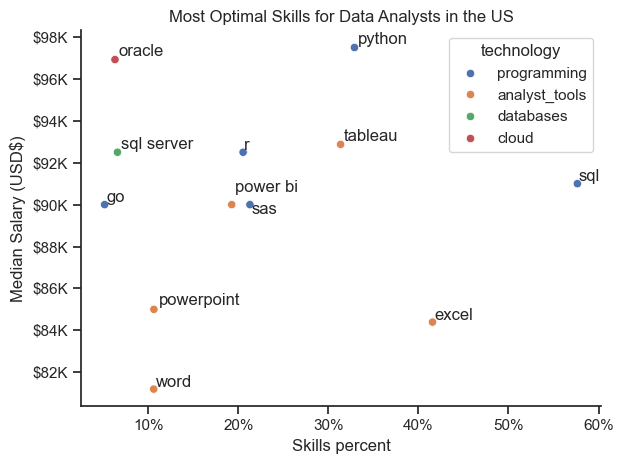

In [ ]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(data=df_plot,y='median_salary',x='skill_percent', hue='technology')
sns.despine()
sns.set_theme(style='ticks')

texts = [] #Created a list and appending as below to use adjust_text
for i, txt in enumerate(df_DA_skills_high_demand.index):
    x = df_DA_skills_high_demand['skill_percent'].iloc[i]
    y = df_DA_skills_high_demand['median_salary'].iloc[i]

    #adjusting power bi to avoid overlap
    if txt.lower() == 'power bi':
        texts.append(plt.text(x, y + 500, txt))  #shift up
    else:
        texts.append(plt.text(x, y, txt))        #default position

#Auto adjust to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

ax = plt.gca() #access to the current axis gca = get current axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 
ax.xaxis.set_major_formatter(PercentFormatter())

plt.title('Most Optimal Skills for Data Analysts in the US')
plt.ylabel("Median Salary (USD$)")
plt.xlabel('Skills percent')

plt.tight_layout()
plt.show()